# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

#print(weather_api_key)

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 648


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URLhttp://api.openweathermap.org/data/2.5/weather
url = "?units=Metric&APPID=" + weather_api_key


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

#Create endpoint URL with each city
#city_url =  url + "&q=" + city

#response = requests.get(city_url).json
#print(response)

#print (url)

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "&q=" + city


    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    city_weather = requests.get(city_url).json()
    #print(response)
   
    try:
        # Parse the JSON and retrieve data
                # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
     
        # Append the City information into city_data list
        city_data.append({"city": city,
                          "lat": city_lat, 
                          "lon": city_lng,
                          "temp_max": city_max_temp,
                          "humidity": city_humidity,
                          "clouds": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kahului
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | avera
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | upernavik
Processing Record 7 of Set 1 | arraial do cabo
Processing Record 8 of Set 1 | kenai
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | koslan
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | sechura
Processing Record 14 of Set 1 | lazaro cardenas
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | lofthus
Processing Record 18 of Set 1 | mongu
Processing Record 19 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 20 of Set 1 | antsohihy
Processing Record 21 of Set 1 | salalah
Processing Record 22 of Set 1 | meulaboh
Processin

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame(city_data)
city_data_df.count()

city          596
lat           596
lon           596
temp_max      596
humidity      596
clouds        596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [9]:
# Display sample data
#Convert the timestamp into a readable date.
city_data_df['Date']=pd.to_datetime(city_data_df['Date'])
#city_data_df=city_data_df.drop(['date'], axis = 1)
city_data_df.head(5)


,city,lat,lon,temp_max,humidity,clouds,Wind Speed,Country,Date
0,kahului,20.8947,-156.4700,28.01,71,40,5.14,US,1970-01-01 00:00:01.682124339
1,hobart,-42.8794,147.3294,18.92,65,75,8.75,AU,1970-01-01 00:00:01.682124069
2,mataura,-46.1927,168.8643,15.71,70,94,1.65,NZ,1970-01-01 00:00:01.682124340
3,avera,33.1940,-82.5271,21.97,58,100,2.95,US,1970-01-01 00:00:01.682124340
4,rikitea,-23.1203,-134.9692,26.05,81,100,7.78,PF,1970-01-01 00:00:01.682124311


In [32]:
#Edit the dataframe headers 
city_data_df = city_data_df.rename(columns={'city' : 'City',
                                           'lat' : 'Latitude',
                                           'lon' : 'Longitude',
                                           'temp_max' : 'Temperature',
                                           'humidity' : 'Humidity',
                                            'clouds' : 'Cloudiness'})
city_data_df['City'] = city_data_df['City'].str.title()
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")
city_data_df.head(5)                                  

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Kahului,20.8947,-156.4700,28.01,71,40,5.14,US,1970-01-01 00:00:01.682124339
1,Hobart,-42.8794,147.3294,18.92,65,75,8.75,AU,1970-01-01 00:00:01.682124069
2,Mataura,-46.1927,168.8643,15.71,70,94,1.65,NZ,1970-01-01 00:00:01.682124340
3,Avera,33.1940,-82.5271,21.97,58,100,2.95,US,1970-01-01 00:00:01.682124340
4,Rikitea,-23.1203,-134.9692,26.05,81,100,7.78,PF,1970-01-01 00:00:01.682124311


In [12]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Kahului,20.8947,-156.4700,28.01,71,40,5.14,US,1970-01-01 00:00:01.682124339
1,Hobart,-42.8794,147.3294,18.92,65,75,8.75,AU,1970-01-01 00:00:01.682124069
2,Mataura,-46.1927,168.8643,15.71,70,94,1.65,NZ,1970-01-01 00:00:01.682124340
3,Avera,33.1940,-82.5271,21.97,58,100,2.95,US,1970-01-01 00:00:01.682124340
4,Rikitea,-23.1203,-134.9692,26.05,81,100,7.78,PF,1970-01-01 00:00:01.682124311


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

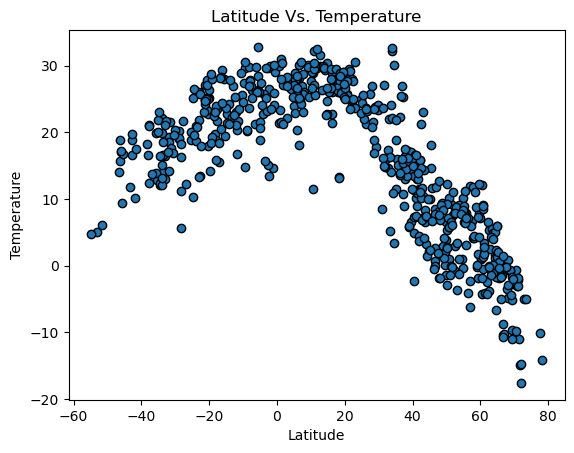

In [33]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

plt.scatter(city_data_df.iloc[:,1],city_data_df.iloc[:,3], edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude Vs. Temperature')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude Vs. Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
#plt.show()

#### Latitude Vs. Humdity


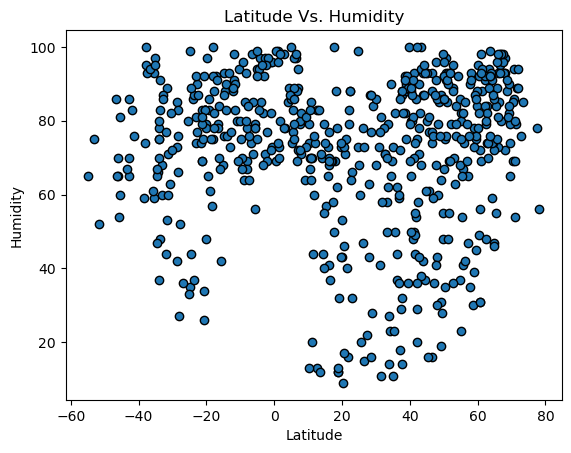

In [14]:
# Build the scatter plots for latitude vs. humidity
# plt.scatter(city_data_df.iloc[:,1],city_data_df.iloc[:,3])
plt.scatter(city_data_df.iloc[:,1],city_data_df.iloc[:,4], edgecolor='black')



# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude Vs. Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

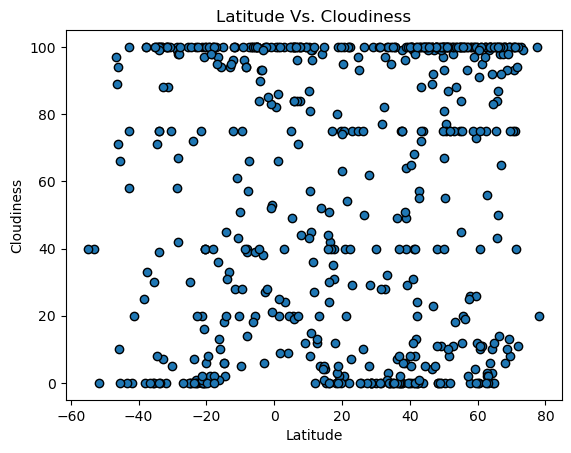

In [34]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df.iloc[:,1],city_data_df.iloc[:,5], edgecolor='black')


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude Vs. Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

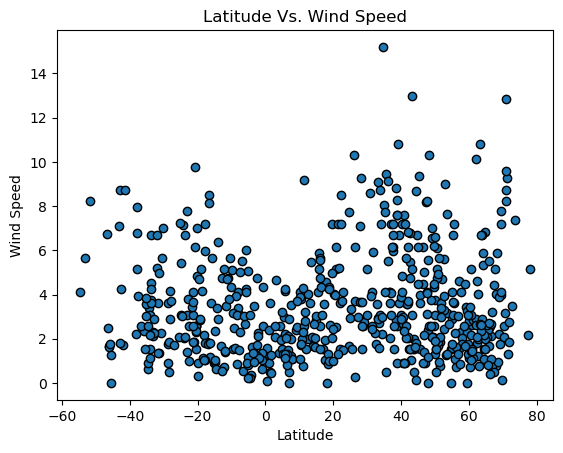

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df.iloc[:,1],city_data_df.iloc[:,6], edgecolor='black')


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude Vs. Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()



---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
#This is the definition of the linear regression function for city_data_df. We will not actually be using this definition,\
#as we will be doing regression plots on northern and southern hemispheres.
x_values = city_data_df['Latitude']
y_values = city_data_df ['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere = city_data_df['Latitude'] >0
northern_hemi_df = city_data_df[northern_hemisphere]

# Display sample data
northern_hemi_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Kahului,20.8947,-156.4700,28.01,71,40,5.14,US,1970-01-01 00:00:01.682124339
3,Avera,33.1940,-82.5271,21.97,58,100,2.95,US,1970-01-01 00:00:01.682124340
5,Upernavik,72.7868,-56.1549,-5.02,76,100,3.46,GL,1970-01-01 00:00:01.682124341
7,Kenai,60.5544,-151.2583,12.05,49,0,5.14,US,1970-01-01 00:00:01.682124342
10,Koslan,63.4564,48.8989,-1.14,94,99,2.64,RU,1970-01-01 00:00:01.682124344


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere = city_data_df['Latitude'] <0
southern_hemi_df = city_data_df[southern_hemisphere]

# Display sample data
southern_hemi_df.head()

# Display sample data
southern_hemi_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Hobart,-42.8794,147.3294,18.92,65,75,8.75,AU,1970-01-01 00:00:01.682124069
2,Mataura,-46.1927,168.8643,15.71,70,94,1.65,NZ,1970-01-01 00:00:01.682124340
4,Rikitea,-23.1203,-134.9692,26.05,81,100,7.78,PF,1970-01-01 00:00:01.682124311
6,Arraial Do Cabo,-22.9661,-42.0278,21.83,74,1,1.42,BR,1970-01-01 00:00:01.682124342
8,Punta Arenas,-53.1500,-70.9167,5.06,75,40,5.66,CL,1970-01-01 00:00:01.682124298


###  Temperature vs. Latitude Linear Regression Plot

The correlation between latitude and temperature for the northern hemisphere is -0.9


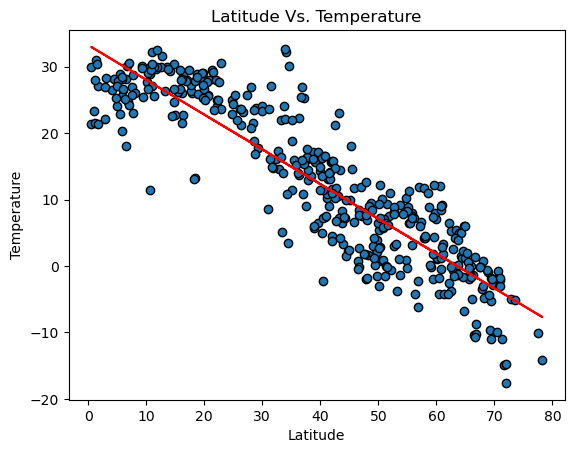

In [21]:
# Linear regression on Northern Hemisphere


plt.xlabel('Latitude')
plt.ylabel('Temperature')
x_values = northern_hemi_df['Latitude']
y_values =northern_hemi_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(northern_hemi_df.iloc[:,1],northern_hemi_df.iloc[:,3], edgecolor='black')
plt.annotate(line_eq,(0,-25),fontsize=15,color="black", fontweight = "bold")
plt.title('Latitude Vs. Temperature')
print (f'The correlation between latitude and temperature for the northern hemisphere is {round(rvalue,2)}')
# Save the figure
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()

The correlation between latitude and temperature for the southern hemisphere is 0.64


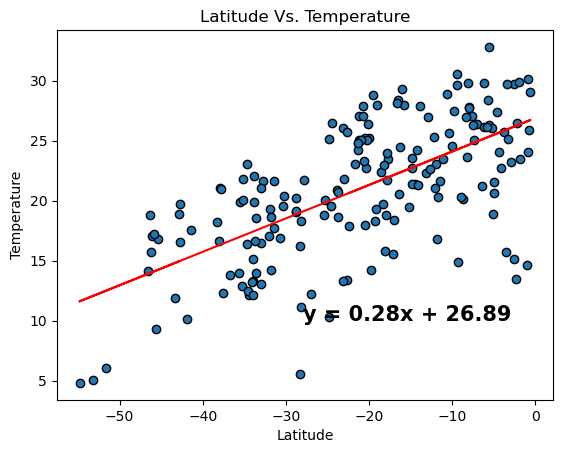

In [22]:
# Linear regression on Southern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Temperature')
x_values = southern_hemi_df['Latitude']
y_values =southern_hemi_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(southern_hemi_df.iloc[:,1],southern_hemi_df.iloc[:,3], edgecolor='black')
plt.annotate(line_eq,(-28, 10),fontsize=15,color="black", fontweight = "bold")
plt.title('Latitude Vs. Temperature')
print (f'The correlation between latitude and temperature for the southern hemisphere is {round(rvalue,2)}')

# Save the figure
plt.savefig("output_data/Fig6.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The correlation between latitude and humidity for the northern hemisphere is 0.15


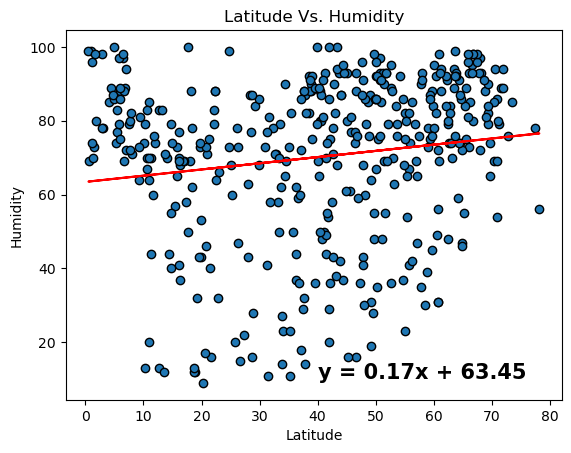

In [26]:
# Northern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Humidity')
x_values = northern_hemi_df['Latitude']
y_values =northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(northern_hemi_df.iloc[:,1],northern_hemi_df.iloc[:,4], edgecolor='black')
plt.annotate(line_eq,(40,10),fontsize=15,color="black", fontweight = "bold")
plt.title('Latitude Vs. Humidity')
print (f'The correlation between latitude and humidity for the northern hemisphere is {round(rvalue,2)}')
# Save the figure
plt.savefig("output_data/Fig7.png")


The correlation between latitude and humidity for the northern hemisphere is 0.28


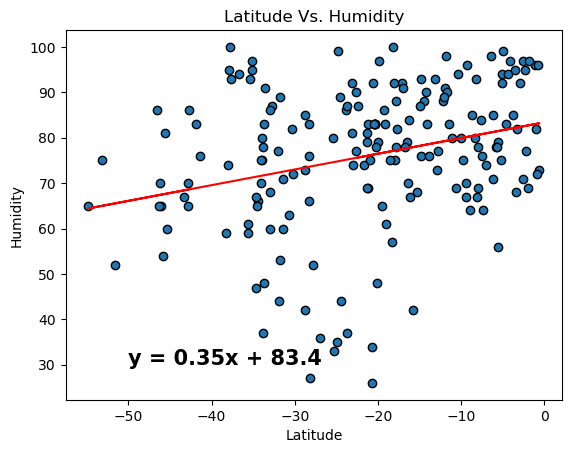

In [25]:
# Southern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Humidity')
x_values = southern_hemi_df['Latitude']
y_values =southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(southern_hemi_df.iloc[:,1],southern_hemi_df.iloc[:,4], edgecolor='black')
plt.annotate(line_eq,(-50,30),fontsize=15,color="black", fontweight = "bold")
plt.title('Latitude Vs. Humidity')
print (f'The correlation between latitude and humidity for the northern hemisphere is {round(rvalue,2)}')
# Save the figure
plt.savefig("output_data/Fig8.png")

### Cloudiness vs. Latitude Linear Regression Plot

The correlation between latitude and cloudiness for the northern hemisphere is 0.15


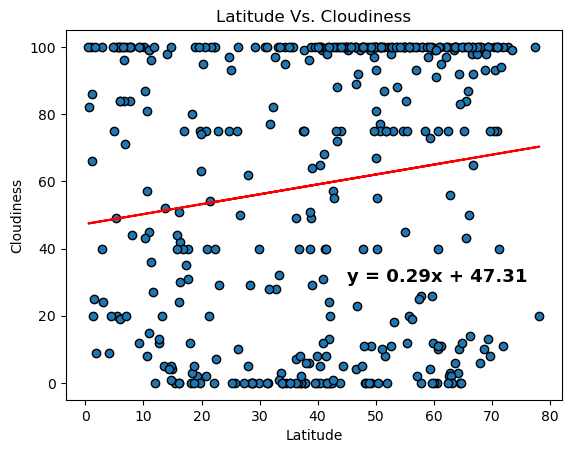

In [28]:
# Northern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
x_values = northern_hemi_df['Latitude']
y_values =northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(northern_hemi_df.iloc[:,1],northern_hemi_df.iloc[:,5], edgecolor='black')
plt.annotate(line_eq,(45,30),fontsize=13,color="black", fontweight = "bold")
plt.title('Latitude Vs. Cloudiness')
print (f'The correlation between latitude and cloudiness for the northern hemisphere is {round(rvalue,2)}')
# Save the figure
plt.savefig("output_data/Fig9.png")

The correlation between latitude and cloudiness for the southern hemisphere is 0.11


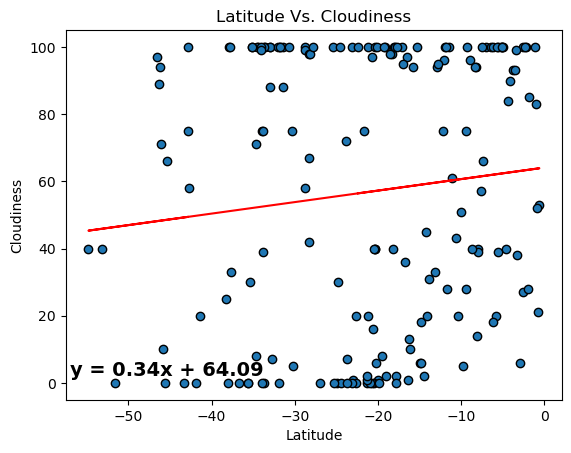

In [29]:
# Southern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
x_values = southern_hemi_df['Latitude']
y_values =southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(southern_hemi_df.iloc[:,1],southern_hemi_df.iloc[:,5], edgecolor='black')
plt.annotate(line_eq,(-57,2),fontsize=14,color="black", fontweight = "bold")
plt.title('Latitude Vs. Cloudiness')
print (f'The correlation between latitude and cloudiness for the southern hemisphere is {round(rvalue,2)}')
# Save the figure
plt.savefig("output_data/Fig10.png")

### Wind Speed vs. Latitude Linear Regression Plot

The correlation between latitude and wind speed for the northern hemisphere is 0.08


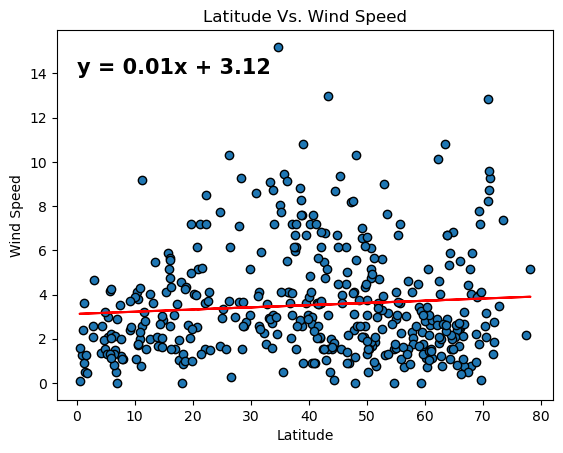

In [30]:
# Northern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
x_values = northern_hemi_df['Latitude']
y_values =northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(northern_hemi_df.iloc[:,1],northern_hemi_df.iloc[:,6], edgecolor='black')
plt.annotate(line_eq,(0,14),fontsize=15,color="black", fontweight = "bold")
plt.title('Latitude Vs. Wind Speed')
print (f'The correlation between latitude and wind speed for the northern hemisphere is {round(rvalue,2)}')
# Save the figure
plt.savefig("output_data/Fig9.png")

The correlation between latitude and wind speed for the southern hemisphere is -0.22


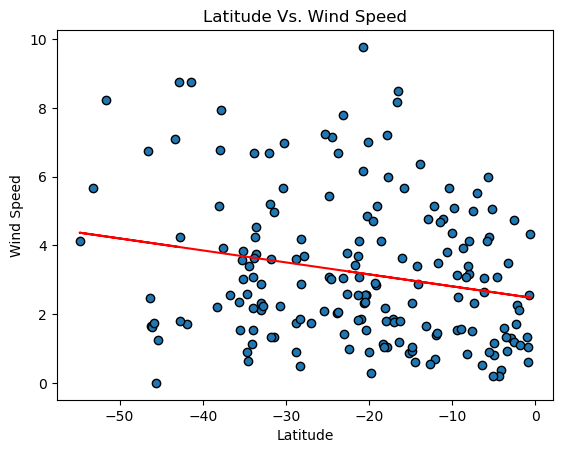

In [31]:
# Southern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
x_values = southern_hemi_df['Latitude']
y_values =southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(southern_hemi_df.iloc[:,1],southern_hemi_df.iloc[:,6], edgecolor='black')
plt.annotate(line_eq,(-55,12),fontsize=15,color="black", fontweight = "bold")
plt.title('Latitude Vs. Wind Speed')
print (f'The correlation between latitude and wind speed for the southern hemisphere is {round(rvalue,2)}')
# Save the figure
plt.savefig("output_data/Fig10.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The linear relationship for temperature demonstrates that there is a clear correlation betwen higher temperatures the closer one travels to the equator. In the northern hemisphere the r-squared coefficient is very stong (-0.9). The reason that the regression is negative is that the North Pole has a latitude of 90', reducing to 0' the closer one travels to the equator. The correlation coeffcient is also strong enough to inidcate that the temperature change decreases south from the equator, with a value of 0.64. This is a postive reression line (latitude decreasing away from the equator to with the South Pole having the lowest value of -90'). The likely reason for the lower correlation coefficient in the Southern Hemisphere is that there are fewer points selected than in the northern, owing to lower land coverage, with Ushuaia (the capital of Tierra del Fuego in Argentina) being considered the southernmost city in the world (at latitude -54'48"S). In contrast the northernmost city is at 78'13"N (Longyearbyen on the island of Spitsbergen).

The other weather conditions tested, wind, humidity and cloudiness, show very a very low correlation with latitude. This is because these weather conditions are influenced by a nunmber of other variables - land mass, areas of high and low pressure, altitude, terrain and distance from the sea. The highest correlation with latitude is 0.28 for humidity in the northern hemisphere., with the other scores being much lower.